In [ ]:
 The data is about the employees of a company having a bad attrition rate.
The data contains some basic information of the employees which are very much needed for the analysis.
Main goal is to build a good model to predict the probability of attrition.

Obejective:

Maximize : Productivity of the eployees
    
Minimize: Attrition rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
emp_survey = pd.read_csv('employee_survey_data.csv')

In [3]:
emp_survey

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [4]:
general_data = pd.read_csv('general_data.csv')

In [5]:
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
df = pd.merge(general_data,emp_survey,on='EmployeeID',how='left')

In [7]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [8]:
#To know each feature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [9]:
#To know missing values in the dataset
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [10]:
#Since there are missing values in the data set, using Mode function to fill the data

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mode()[0])
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0])
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0])
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mode()[0])
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mode()[0])

In [11]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [12]:
#Checking for the duplicate values in the dataset
 
duplicate = df.duplicated()

sum(duplicate)

0

In [13]:
#There are no duplicate values

In [14]:
#To know the data type of each feature
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [15]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('int64')
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype('int64')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('int64')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('int64')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('int64')

In [16]:
df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeID                  int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
WorkLifeBalance             int64
dtype: object

In [17]:
#Dropping the nominal data
df.drop(['EmployeeCount','EmployeeID'],axis=1, inplace=True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

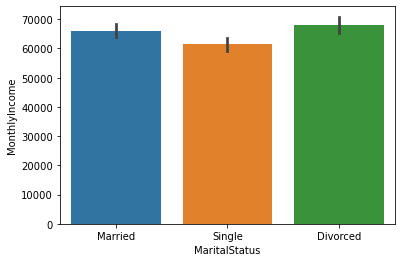

In [18]:

sns.barplot(x='MaritalStatus',y='MonthlyIncome', data=df)

In [423]:
#Obseravation
Monthly income of Divorced employees is higher than both married and single employees.

<AxesSubplot:xlabel='MaritalStatus', ylabel='YearsAtCompany'>

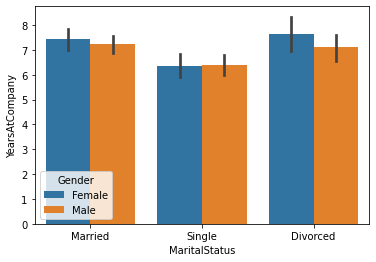

In [20]:
sns.barplot(x='MaritalStatus',y='YearsAtCompany',hue='Gender',data=df)

In [ ]:
#obseravation
Women have worked for slightly longer period of time than men
Divorced employees have stayed longer in the company than singles and Married

<AxesSubplot:xlabel='MaritalStatus', ylabel='JobSatisfaction'>

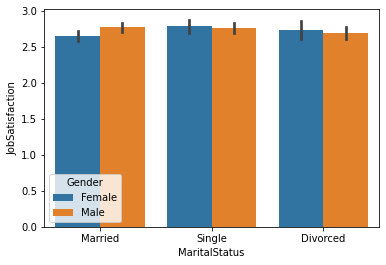

In [21]:
sns.barplot(x='MaritalStatus',y='JobSatisfaction',hue='Gender',data=df)

In [ ]:
#Observation
Both men and women have equal amount of job satisfaction

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

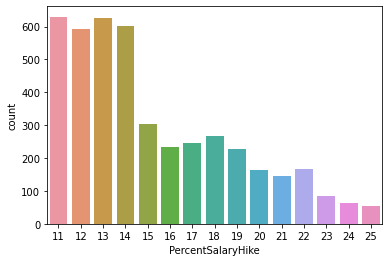

In [22]:
sns.countplot('PercentSalaryHike',data=df)

In [67]:
#observation
Highest number of eployees have received hike between 11 and 14

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

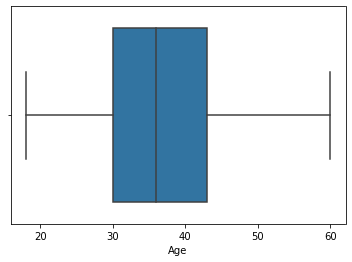

In [19]:
#Checking for outliers in the dataset
sns.boxplot(df.Age)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome'>

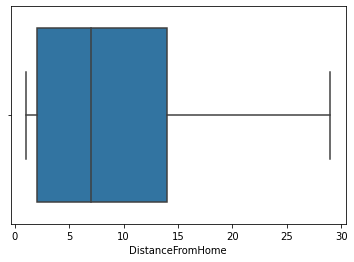

In [20]:
sns.boxplot(df.DistanceFromHome)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

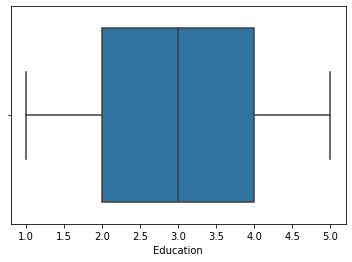

In [21]:
sns.boxplot(df.Education)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel'>

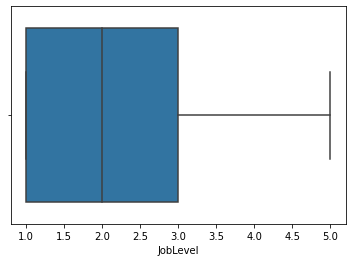

In [22]:
sns.boxplot(df.JobLevel)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

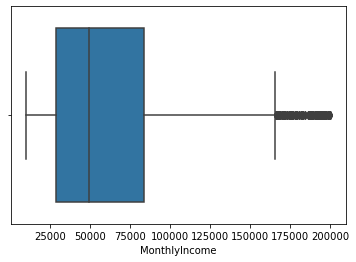

In [23]:
sns.boxplot(df.MonthlyIncome)

In [24]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
Q1, Q3

(29110.0, 83800.0)

In [25]:
IQR = Q3 -Q1
IQR

54690.0

In [26]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-52925.0, 165835.0)

In [27]:
outlier = np.where(df['MonthlyIncome']>upper_limit,True,np.where(df['MonthlyIncome']<lower_limit,True,False))
outlier

array([False, False,  True, ..., False, False, False])

In [28]:
df_trimmed = df.loc[~(outlier),]

df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,...,8,0,28,5,7,7,7,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [29]:
#Applying winsorization technique to replace the outliers with upper limit or lower limit values
from feature_engine.outliers import Winsorizer

In [30]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='MonthlyIncome')
df_t = winsor.fit_transform(df[['MonthlyIncome']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

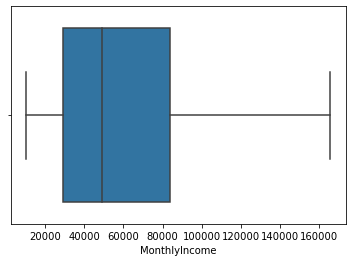

In [31]:
sns.boxplot(df_t.MonthlyIncome)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

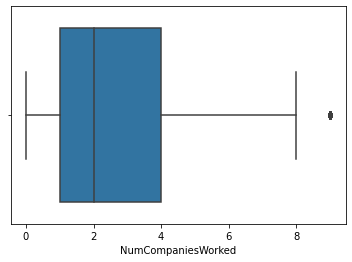

In [32]:
sns.boxplot(df.NumCompaniesWorked)

In [33]:
Q1 = df['NumCompaniesWorked'].quantile(0.25)
Q3 = df['NumCompaniesWorked'].quantile(0.75)
Q1, Q3

(1.0, 4.0)

In [34]:
IQR = Q3 -Q1
IQR

3.0

In [35]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-3.5, 8.5)

In [36]:
outlier = np.where(df['NumCompaniesWorked']>upper_limit,True,np.where(df['NumCompaniesWorked']<lower_limit,True,False))
outlier

array([False, False, False, ..., False, False, False])

In [37]:
df_trimmed = df.loc[~(outlier),]

df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [38]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='NumCompaniesWorked')
df_t1 = winsor.fit_transform(df[['NumCompaniesWorked']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

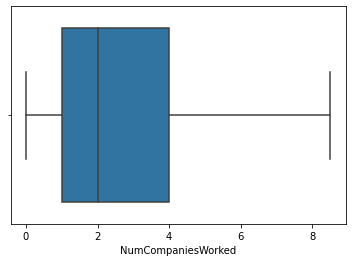

In [39]:
sns.boxplot(df_t1.NumCompaniesWorked)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike'>

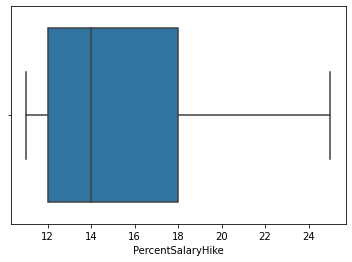

In [40]:
sns.boxplot(df.PercentSalaryHike)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StandardHours'>

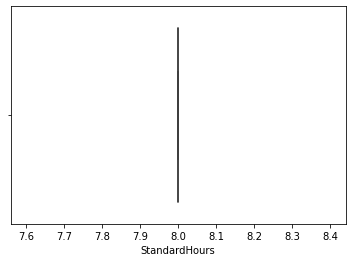

In [41]:
sns.boxplot(df.StandardHours)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

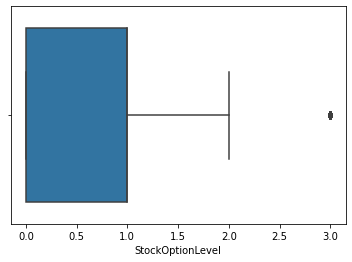

In [42]:
sns.boxplot(df.StockOptionLevel)

In [43]:
Q1 = df['StockOptionLevel'].quantile(0.25)
Q3 = df['StockOptionLevel'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(0.0, 1.0, 1.0)

In [44]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-1.5, 2.5)

In [45]:
outlier = np.where(df['StockOptionLevel']>upper_limit,True,np.where(df['StockOptionLevel']<lower_limit,True,False))
outlier

array([False, False,  True, ..., False, False, False])

In [46]:

df_trimmed = df.loc[~(outlier),]

df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,...,8,0,28,5,7,7,7,3,2,2
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,8,1,5,2,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [47]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='StockOptionLevel')
df_t2 = winsor.fit_transform(df[['StockOptionLevel']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

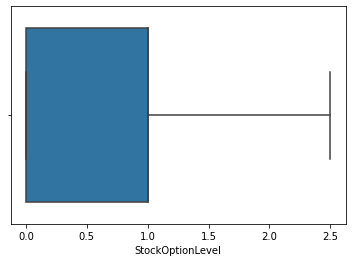

In [48]:
sns.boxplot(df_t2.StockOptionLevel)

In [49]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

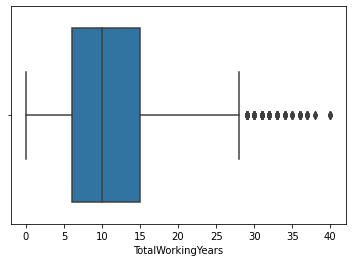

In [50]:
sns.boxplot(df.TotalWorkingYears)

In [51]:

Q1 = df['TotalWorkingYears'].quantile(0.25)
Q3 = df['TotalWorkingYears'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(6.0, 15.0, 9.0)

In [52]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-7.5, 28.5)

In [53]:
outlier = np.where(df['TotalWorkingYears']>upper_limit,True,np.where(df['TotalWorkingYears']<lower_limit,True,False))
outlier

array([False, False, False, ..., False, False, False])

In [54]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [55]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='TotalWorkingYears')
df_t3 = winsor.fit_transform(df[['TotalWorkingYears']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

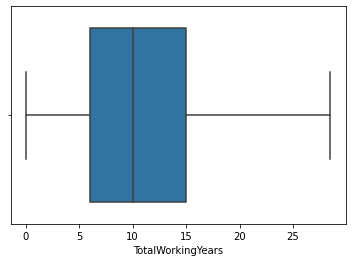

In [56]:
sns.boxplot(df_t3.TotalWorkingYears)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

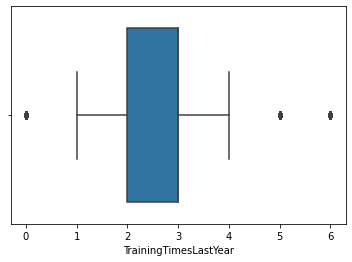

In [57]:
sns.boxplot(df.TrainingTimesLastYear)

In [58]:

Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(2.0, 3.0, 1.0)

In [59]:



lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(0.5, 4.5)

In [60]:
outlier = np.where(df['TrainingTimesLastYear']>upper_limit,True,np.where(df['TrainingTimesLastYear']<lower_limit,True,False))
outlier

array([ True, False, False, ..., False, False,  True])

In [61]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,8,1,5,2,0,0,0,1,3,1
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,...,8,3,10,2,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,Female,1,Manufacturing Director,...,8,1,20,2,19,11,8,3,3,3
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,8,0,6,2,6,1,5,3,4,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3


In [62]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='TrainingTimesLastYear')
df_t4 = winsor.fit_transform(df[['TrainingTimesLastYear']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

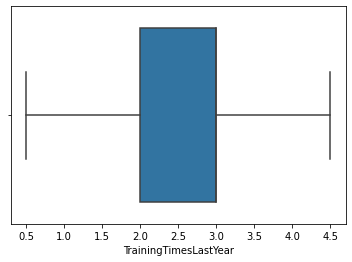

In [63]:
sns.boxplot(df_t4.TrainingTimesLastYear)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

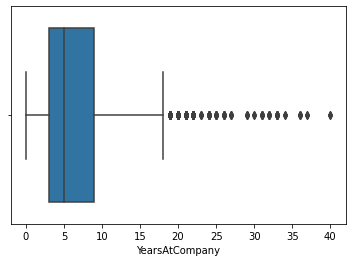

In [64]:
sns.boxplot(df.YearsAtCompany)

In [65]:
Q1 = df['YearsAtCompany'].quantile(0.25)
Q3 = df['YearsAtCompany'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(3.0, 9.0, 6.0)

In [66]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-6.0, 18.0)

In [67]:
outlier = np.where(df['YearsAtCompany']>upper_limit,True,np.where(df['YearsAtCompany']<lower_limit,True,False))
outlier

array([False, False, False, ..., False, False,  True])

In [68]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,8,0,6,2,6,1,5,3,4,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3


In [69]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='YearsAtCompany')
df_t5 = winsor.fit_transform(df[['YearsAtCompany']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

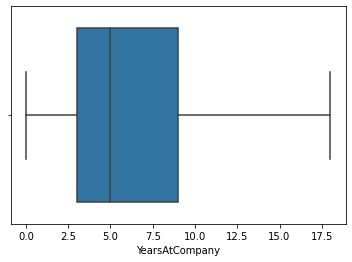

In [70]:
sns.boxplot(df_t5.YearsAtCompany)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

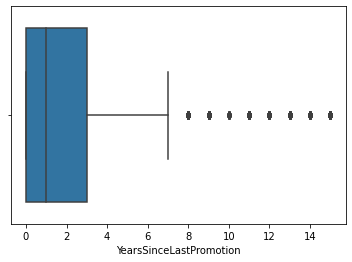

In [71]:
sns.boxplot(df.YearsSinceLastPromotion)

In [72]:
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(0.0, 3.0, 3.0)

In [73]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-4.5, 7.5)

In [74]:
outlier = np.where(df['YearsSinceLastPromotion']>upper_limit,True,np.where(df['YearsSinceLastPromotion']<lower_limit,True,False))
outlier

array([False, False, False, ..., False, False, False])

In [75]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [76]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='YearsSinceLastPromotion')
df_t6 = winsor.fit_transform(df[['YearsSinceLastPromotion']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

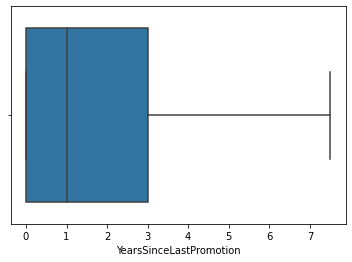

In [77]:
sns.boxplot(df_t6.YearsSinceLastPromotion)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

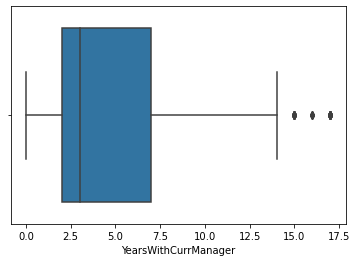

In [78]:
sns.boxplot(df.YearsWithCurrManager)

In [79]:
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)
IQR = Q3-Q1

Q1,Q3,IQR

(2.0, 7.0, 5.0)

In [80]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit, upper_limit

(-5.5, 14.5)

In [81]:
outlier = np.where(df['YearsWithCurrManager']>upper_limit,True,np.where(df['YearsWithCurrManager']<lower_limit,True,False))
outlier

array([False, False, False, ..., False, False, False])

In [82]:
df_trimmed = df.loc[~(outlier),]

df_trimmed


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,8,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,8,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,8,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,8,2,9,2,6,0,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,8,1,10,5,3,0,2,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,8,0,10,2,3,0,2,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,8,0,5,4,4,1,2,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,8,1,10,2,9,7,8,4,1,3


In [83]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='YearsWithCurrManager')
df_t7 = winsor.fit_transform(df[['YearsWithCurrManager']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

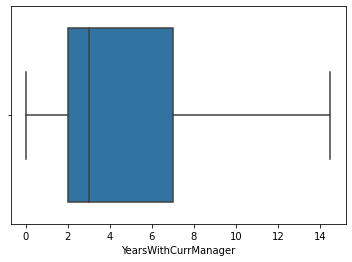

In [84]:
sns.boxplot(df_t7.YearsWithCurrManager)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction'>

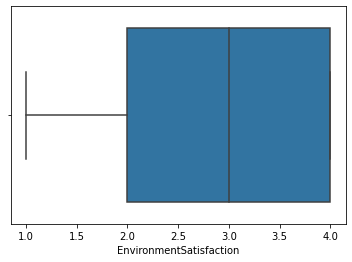

In [85]:
sns.boxplot(df.EnvironmentSatisfaction)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction'>

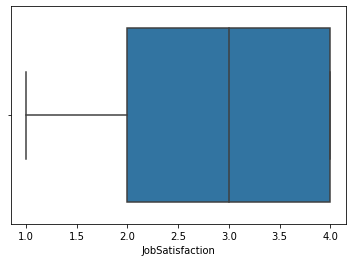

In [86]:
sns.boxplot(df.JobSatisfaction)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkLifeBalance'>

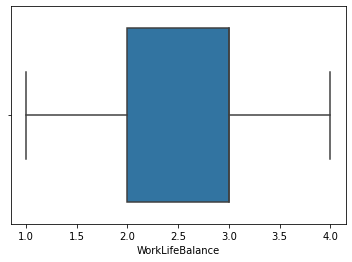

In [87]:
sns.boxplot(df.WorkLifeBalance)

In [88]:
print(df['Over18'].unique())

['Y']


In [89]:
#Converting the discrete data into continuous data
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['Over18'] = df['Over18'].map({'Y':1,})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Married':0,'Single':1,'Divorced':2})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})
df['Department'] = df['Department'].map({'Research & Development':0,'Sales':1,'Human Resources':2})
df['EducationField'] = df['EducationField'].map({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5})
df['JobRole'] = df['JobRole'].map({'Sales Executive':0,'Medical':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,'Human Resources':9})
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,0,1,6,2,0,0,1,5,...,8,0,1,6,1,0,0,3,4,2
1,31,1,1,0,10,1,0,0,1,2,...,8,1,6,3,5,1,4,3,2,4
2,32,0,1,0,17,4,4,1,4,0,...,8,3,5,2,5,0,3,2,2,1
3,38,0,2,0,2,5,0,1,3,9,...,8,3,13,5,8,7,5,4,4,3
4,32,0,0,0,10,1,1,1,1,0,...,8,2,9,2,6,0,4,4,1,3


sns.countplot(x='Attrition', data=df)

<AxesSubplot:xlabel='Gender', ylabel='BusinessTravel'>

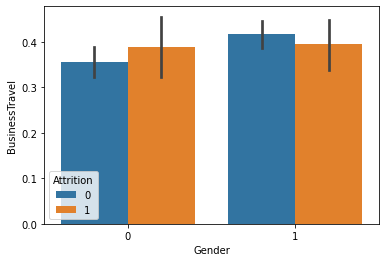

In [92]:
sns.barplot(x='Gender',y='BusinessTravel',hue='Attrition',data=df)

In [ ]:
#observation
Attrition is high among women who travel frequently

<AxesSubplot:xlabel='MaritalStatus', ylabel='DistanceFromHome'>

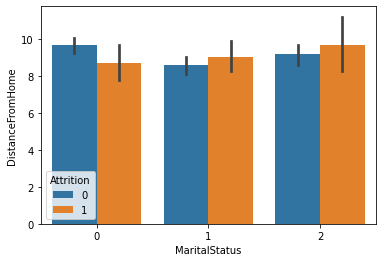

In [94]:
sns.barplot(x='MaritalStatus',y='DistanceFromHome',hue='Attrition',data=df)

In [ ]:
#observation
Attrition is high among Divorced employees who trvel longer ditance to office

<AxesSubplot:xlabel='Gender', ylabel='JobSatisfaction'>

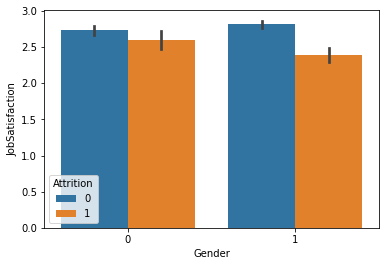

In [95]:
sns.barplot(x='Gender',y='JobSatisfaction',hue='Attrition',data=df)

In [ ]:
#observation
Men have higher job satisfaction and lower attrition than women.

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

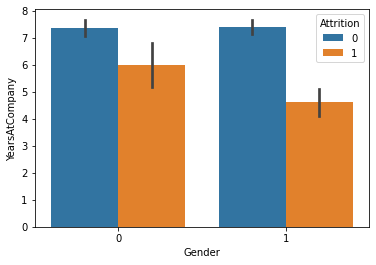

In [99]:
sns.barplot(x='Gender',y='YearsAtCompany',hue='Attrition',data=df)

In [ ]:
#observation
Number of Men and Women with number of years at company is same still attrition is less in men than women.

<AxesSubplot:xlabel='Gender', ylabel='YearsWithCurrManager'>

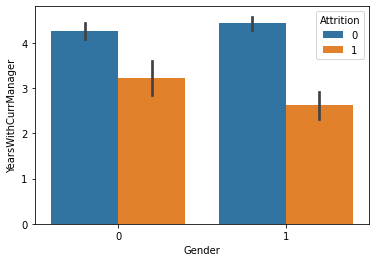

In [100]:
sns.barplot(x='Gender',y='YearsWithCurrManager',hue='Attrition',data=df)

In [ ]:
#observation
Number of Men and Women with number of years with Manager is same and attrition is less in men than women.

In [495]:
#Splitting the data as independent and dependent features
X = df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
Y = df.iloc[:,[1]]
X,Y

(      Age  BusinessTravel  Department  DistanceFromHome  Education  \
 0      51               0           1                 6          2   
 1      31               1           0                10          1   
 2      32               1           0                17          4   
 3      38               2           0                 2          5   
 4      32               0           0                10          1   
 ...   ...             ...         ...               ...        ...   
 4405   42               0           0                 5          4   
 4406   29               0           0                 2          4   
 4407   25               0           0                25          2   
 4408   42               0           1                18          2   
 4409   40               0           0                28          3   
 
       EducationField  Gender  JobLevel  JobRole  MaritalStatus  ...  \
 0                  0       0         1        5              0  ...   
 1

In [496]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.33, random_state=42)

In [497]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [498]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l2','elasticnet'],'C':[1,5,6,10,20,40],'max_iter':[100,200]}

In [499]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [500]:
classifier_regressor.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 6, 10, 20, 40], 'max_iter': [100, 200],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [501]:
#Accuracy score
print(classifier_regressor.best_score_)

0.8381852074908945


In [503]:
#Prediction
y_predict = classifier_regressor.predict(X_test)

In [504]:
#Accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [505]:
score = accuracy_score(y_predict,y_test)
print(score)

0.8427197802197802


In [506]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1456
           1       0.00      0.00      0.00         0

    accuracy                           0.84      1456
   macro avg       0.50      0.42      0.46      1456
weighted avg       1.00      0.84      0.91      1456



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Conclusion
Attrition has highest dependency on fetures such as Years at company,Years with current manager,Business Travell and Job satisfaction.
Company should focus on above mentioned features to reduce attrition.
Above logistic model is best fit for the dataset with an accuracy of 84%.
